In [2]:
from scipy.io import loadmat
# Load the MAT file
data_path = 'dataPro.mat'
data = loadmat(data_path)

# Explore the keys and structure of the loaded data
data_keys = list(data.keys())
data_structure = {key: type(data[key]) for key in data_keys}

# Provide the keys and their data types to understand the structure
data_keys, data_structure

(['__header__',
  '__version__',
  '__globals__',
  'dff_filtered',
  'green_idx',
  'positions',
  'red_idx'],
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'dff_filtered': numpy.ndarray,
  'green_idx': numpy.ndarray,
  'positions': numpy.ndarray,
  'red_idx': numpy.ndarray})

In [3]:
positions = data['positions']
print(positions)
dff_filtered= data['dff_filtered']

[[2.47004847e+03 1.94432247e+02 2.15233613e+00 1.00000000e+00
  1.00000000e+00]
 [1.55859147e+03 2.03546259e+02 2.25322689e+00 2.00000000e+00
  1.00000000e+00]
 [1.96874712e+03 2.00508255e+02 2.21959664e+00 3.00000000e+00
  1.00000000e+00]
 ...
 [1.10286297e+03 2.16609676e+03 1.95492655e+02 5.76400000e+03
  7.00000000e+00]
 [1.63150803e+03 2.35445300e+03 1.97577731e+02 5.76500000e+03
  7.00000000e+00]
 [2.30902440e+03 2.36356701e+03 1.97678622e+02 5.76600000e+03
  7.00000000e+00]]


In [4]:
import plotly.graph_objects as go
from scipy.io import loadmat

# Load your data
# data = loadmat('path_to_your_file.mat')
positions = data['positions']

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=positions[:, 0],
    y=positions[:, 1],
    z=positions[:, 2],
    mode='markers',
    marker=dict(
        size=2,  # Adjust marker size for visibility
        opacity=0.8,  # Adjust opacity to make it easier to see overlaps
    )
)])

# Update plot layout for a better view
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    )
)

# Show the plot
fig.show()


In [5]:
import plotly.graph_objects as go
# Assuming data is already loaded from your .mat file

# Extract indices for green and red neurons
green_idx = data['green_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary
red_idx = data['red_idx'].flatten() - 1  # Adjust for Python's zero-based indexing if necessary

# Extract positions for all neurons
positions = data['positions']

# Separate positions for green and red neurons using the indices
green_positions = positions[green_idx, :]
red_positions = positions[red_idx, :]

# Create a Plotly figure
fig = go.Figure()

# Add green neurons to the plot
fig.add_trace(go.Scatter3d(
    x=green_positions[:, 0],
    y=green_positions[:, 1],
    z=green_positions[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color='green',  # Specify the color for green neurons
        opacity=0.8
    ),
    name='Excitatory neuron'  # Label for the legend
))

# Add red neurons to the plot
fig.add_trace(go.Scatter3d(
    x=red_positions[:, 0],
    y=red_positions[:, 1],
    z=red_positions[:, 2],
    mode='markers',
    marker=dict(
        size=2,
        color='red',  # Specify the color for red neurons
        opacity=0.8
    ),
    name='Inhibitory neurons'  # Label for the legend
))

# Update plot layout for a better view
fig.update_layout(
    margin=dict(l=0, r=0, b=0, t=0),
    scene=dict(
        xaxis_title='X Axis',
        yaxis_title='Y Axis',
        zaxis_title='Z Axis'
    ),
    legend_title="Neuron Types"
)

# Show the plot
fig.show()


In [6]:
print(len(green_idx))
print(len(red_idx))

4414
1352


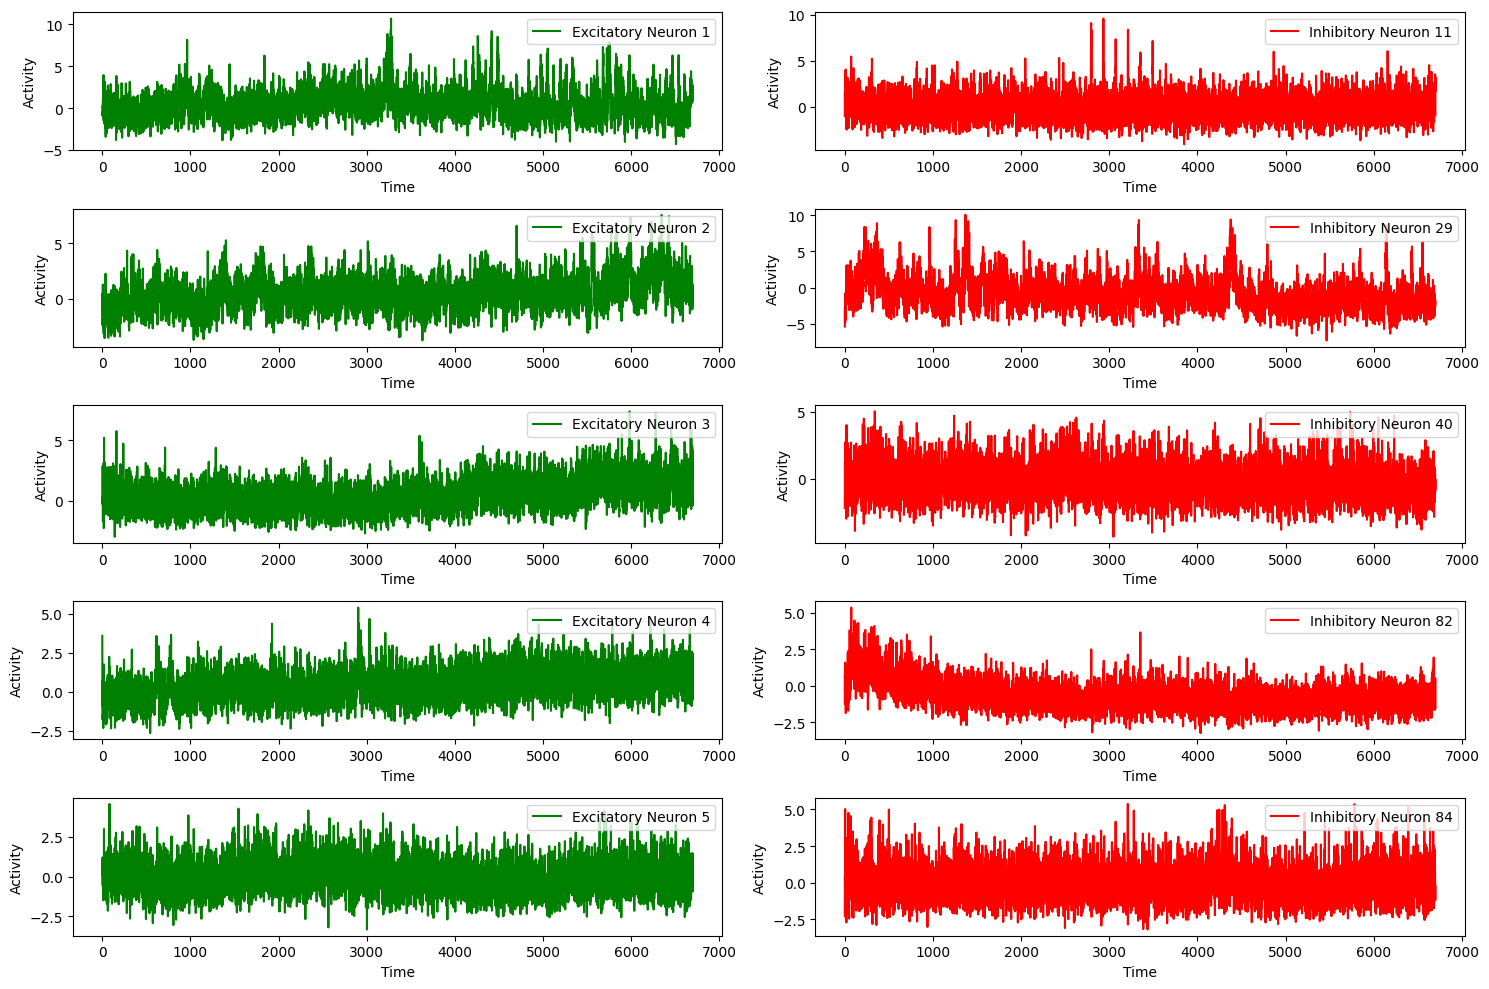

In [7]:
import matplotlib.pyplot as plt

# Assuming 'dff_filtered', 'green_idx', and 'red_idx' are already loaded from your .mat file

# Explicitly select the first 5 indices for excitatory (green) and inhibitory (red) neurons
selected_green_idx = green_idx[:5]  # Selecting first 5 excitatory neurons
selected_red_idx = red_idx[:5]  # Selecting first 5 inhibitory neurons

# Extract time series data for the selected neurons
selected_green_data = dff_filtered[selected_green_idx, :]
selected_red_data = dff_filtered[selected_red_idx, :]

# Plotting
plt.figure(figsize=(15, 10))

# Plot excitatory neurons
for i, idx in enumerate(selected_green_idx, start=1):
    plt.subplot(5, 2, i*2-1)  # Positioning plots in a 5x2 grid
    plt.plot(selected_green_data[i-1, :], label=f'Excitatory Neuron {idx+1}',color="green")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')
    

# Plot inhibitory neurons
for i, idx in enumerate(selected_red_idx, start=1):
    plt.subplot(5, 2, i*2)  # Positioning plots in a 5x2 grid
    plt.plot(selected_red_data[i-1, :], label=f'Inhibitory Neuron {idx+1}', color="red")
    plt.legend(loc='upper right')
    plt.xlabel('Time')
    plt.ylabel('Activity')

plt.tight_layout()
plt.show()





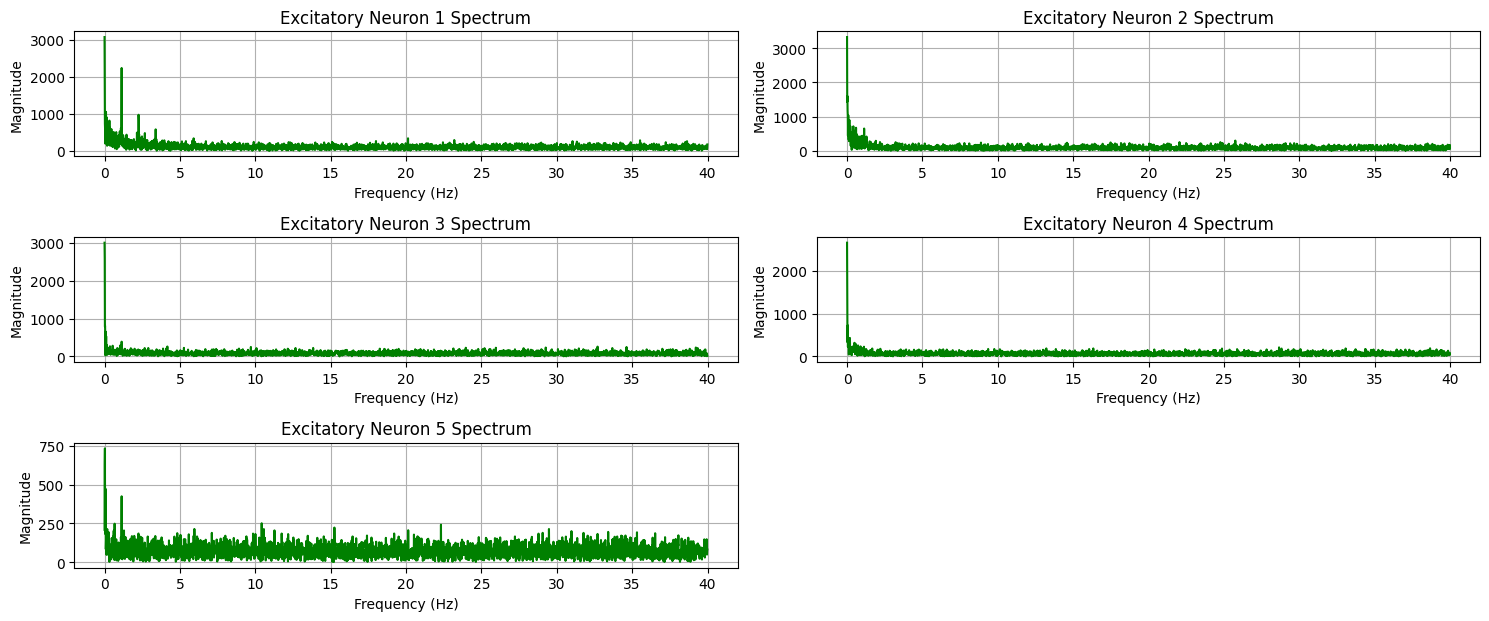

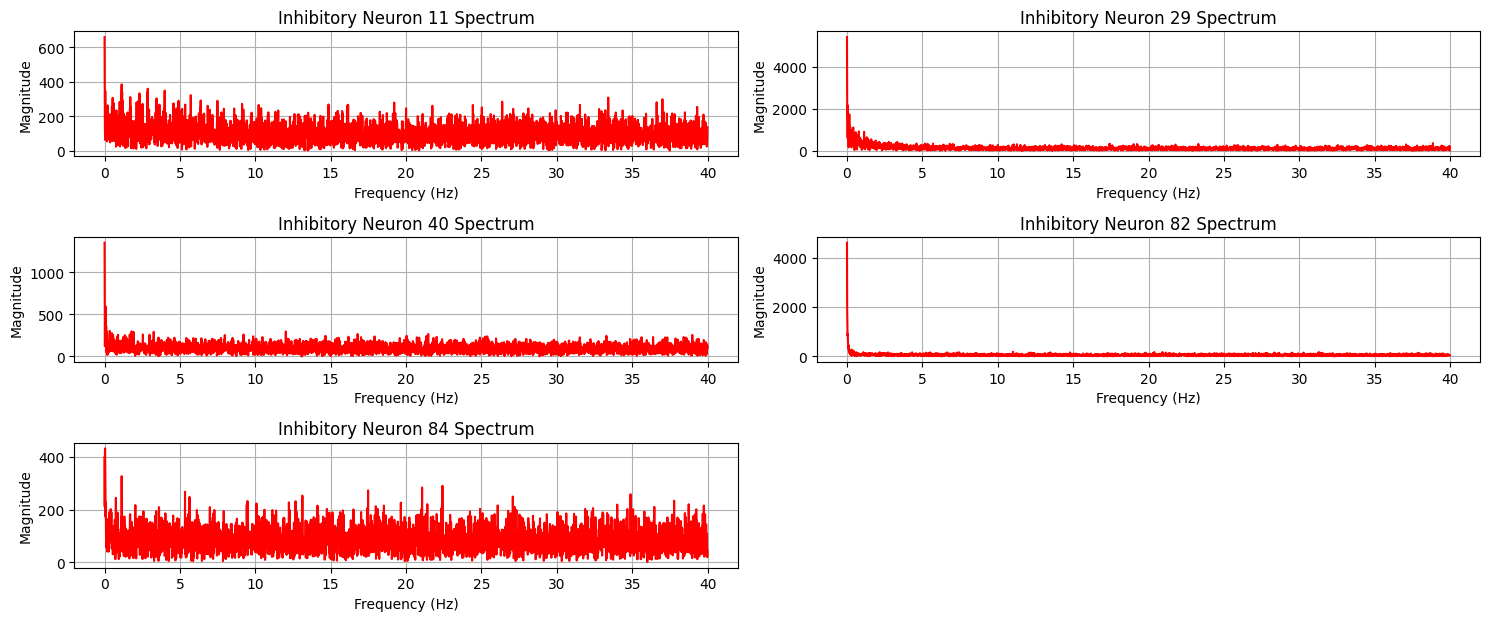

In [8]:
import numpy as np

# Function to calculate and plot the frequency spectrum
def plot_frequency_spectrum(data, fs, neuron_ids, neuron_type, color):
    plt.figure(figsize=(15, 10))
    for i, neuron_data in enumerate(data, start=1):
        # Perform the FFT
        yf = np.fft.fft(neuron_data)
        xf = np.fft.fftfreq(len(neuron_data), 1 / fs)
        
        # Plotting only the positive frequencies
        plt.subplot(5, 2, i)
        plt.plot(xf[:len(xf)//2], np.abs(yf[:len(yf)//2]), color=color)
        plt.title(f'{neuron_type} Neuron {neuron_ids[i-1]+1} Spectrum')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Assuming your sampling rate (fs) is known and consistent for all neurons
fs = 80  # This is an example, please adjust it according to your actual sampling rate

# Plotting the frequency spectrum for selected excitatory neurons
plot_frequency_spectrum(selected_green_data, fs, selected_green_idx, "Excitatory", "green")

# Plotting the frequency spectrum for selected inhibitory neurons
plot_frequency_spectrum(selected_red_data, fs, selected_red_idx, "Inhibitory", "red")


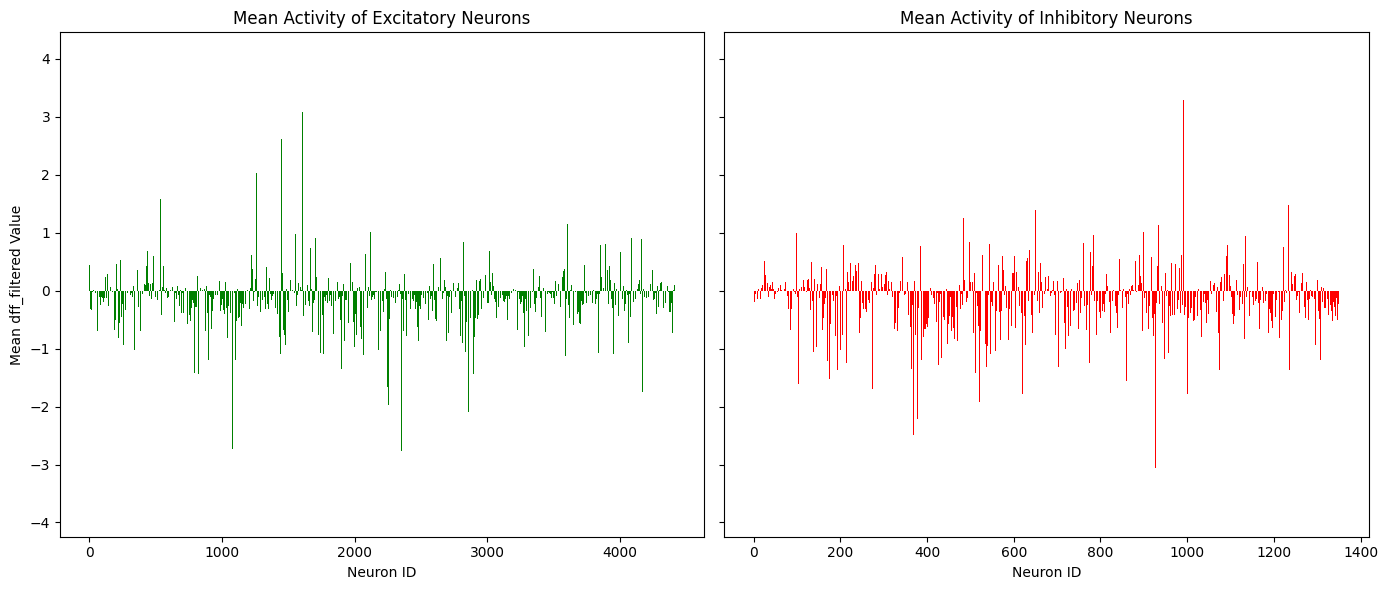

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dff_filtered', 'green_idx', and 'red_idx' are already loaded from your .mat file

# Calculate the mean activity across time for each neuron
mean_activity_all = np.mean(dff_filtered, axis=1)

# Calculate the mean activity for excitatory and inhibitory neurons separately
mean_activity_excitatory = mean_activity_all[green_idx]
mean_activity_inhibitory = mean_activity_all[red_idx]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Excitatory Neurons
axs[0].bar(range(len(mean_activity_excitatory)), mean_activity_excitatory, color='green')
axs[0].set_title('Mean Activity of Excitatory Neurons')
axs[0].set_xlabel('Neuron ID')
axs[0].set_ylabel('Mean dff_filtered Value')

# Inhibitory Neurons
axs[1].bar(range(len(mean_activity_inhibitory)), mean_activity_inhibitory, color='red')
axs[1].set_title('Mean Activity of Inhibitory Neurons')
axs[1].set_xlabel('Neuron ID')

plt.tight_layout()
plt.show()


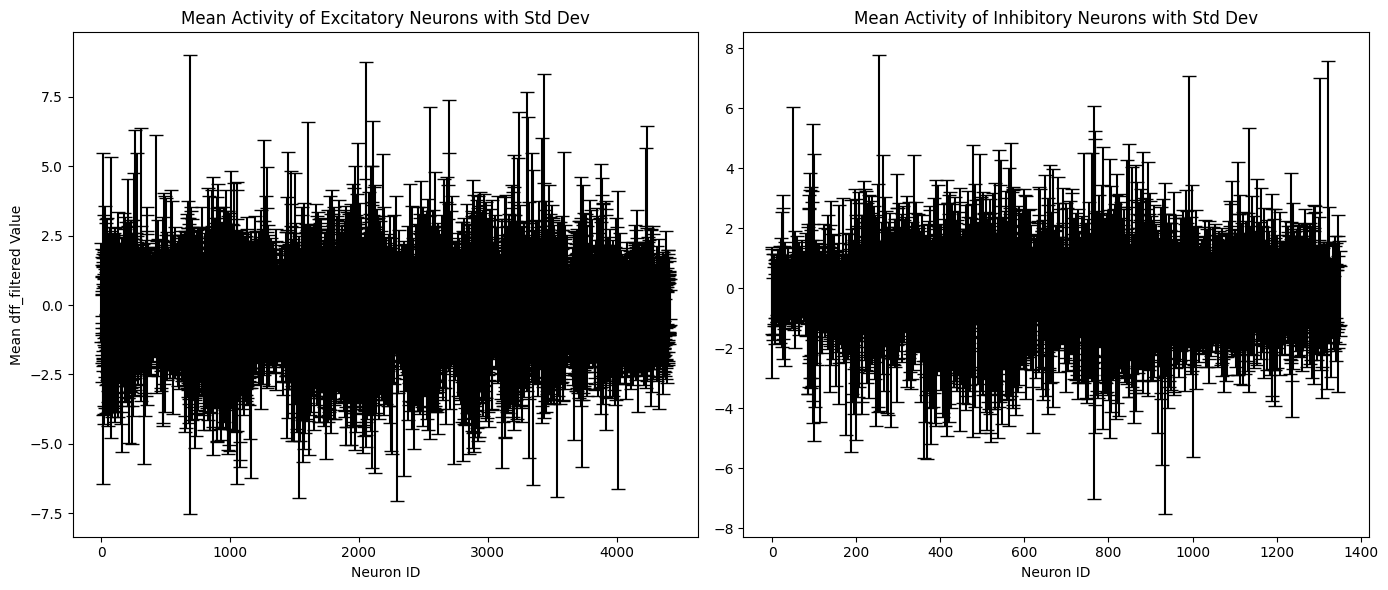

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Calculate standard deviation for excitatory and inhibitory neurons
std_activity_excitatory = np.std(dff_filtered[green_idx, :], axis=1)
std_activity_inhibitory = np.std(dff_filtered[red_idx, :], axis=1)

# Plotting Mean Activity with Standard Deviation for Excitatory Neurons
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(mean_activity_excitatory)), mean_activity_excitatory, color='green', yerr=std_activity_excitatory, capsize=5)
plt.title('Mean Activity of Excitatory Neurons with Std Dev')
plt.xlabel('Neuron ID')
plt.ylabel('Mean dff_filtered Value')

# Plotting Mean Activity with Standard Deviation for Inhibitory Neurons
plt.subplot(1, 2, 2)
plt.bar(range(len(mean_activity_inhibitory)), mean_activity_inhibitory, color='red', yerr=std_activity_inhibitory, capsize=5)
plt.title('Mean Activity of Inhibitory Neurons with Std Dev')
plt.xlabel('Neuron ID')

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd

# Assuming 'dff_filtered', 'green_idx', 'red_idx' are loaded, and numpy as np, pandas as pd are imported

# Calculate mean and standard deviation for all neurons
mean_activity_all = np.mean(dff_filtered, axis=1)
std_activity_all = np.std(dff_filtered, axis=1)

# Create an array to label each neuron as 'Excitatory' or 'Inhibitory'
neuron_types = np.array(['Unknown'] * len(dff_filtered))
neuron_types[green_idx] = 'Excitatory'
neuron_types[red_idx] = 'Inhibitory'

# Create a DataFrame
neurons_df = pd.DataFrame({
    'Mean Activity': mean_activity_all,
    'Standard Deviation': std_activity_all,
    'Neuron Type': neuron_types
})

# Save the DataFrame to a CSV file
csv_file_path = 'neurons_activity_mean_std.csv'  # Specify your desired file path
neurons_df.to_csv(csv_file_path, index_label='Neuron ID')

print(f"CSV file has been saved to: {csv_file_path}")


CSV file has been saved to: neurons_activity_mean_std.csv


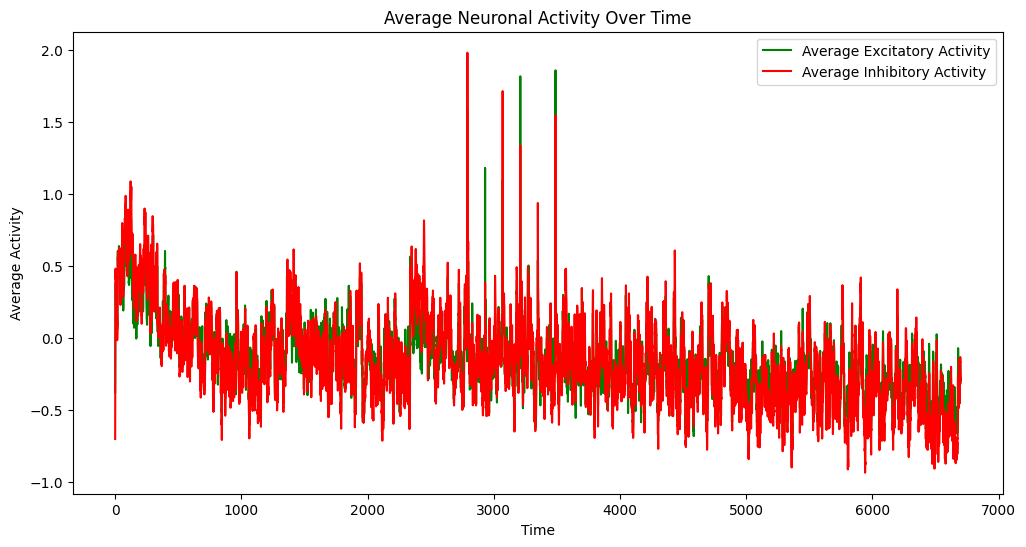

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dff_filtered', 'green_idx', and 'red_idx' are already loaded from your .mat file

# Calculate the mean activity over time for excitatory neurons
average_excitatory_activity = np.mean(dff_filtered[green_idx, :], axis=0)

# Calculate the mean activity over time for inhibitory neurons
average_inhibitory_activity = np.mean(dff_filtered[red_idx, :], axis=0)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(average_excitatory_activity, label='Average Excitatory Activity', color='green')
plt.plot(average_inhibitory_activity, label='Average Inhibitory Activity', color='red')
plt.xlabel('Time')
plt.ylabel('Average Activity')
plt.title('Average Neuronal Activity Over Time')
plt.legend()
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Standardize the data before applying PCA
scaler = StandardScaler()
dff_filtered_scaled = scaler.fit_transform(dff_filtered)

# Apply PCA, keeping the first 2 principal components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(dff_filtered_scaled)

# Calculate the explained variance ratio of the first two components
explained_variance_ratio = pca.explained_variance_ratio_

pca_result, explained_variance_ratio



(array([[27.96519023, 16.58274065],
        [36.80605717, -3.35006035],
        [34.37746758,  2.27596281],
        ...,
        [19.28061307,  4.70884731],
        [14.48213179,  3.87203374],
        [10.51203305,  3.5246526 ]]),
 array([0.10450456, 0.01990658]))

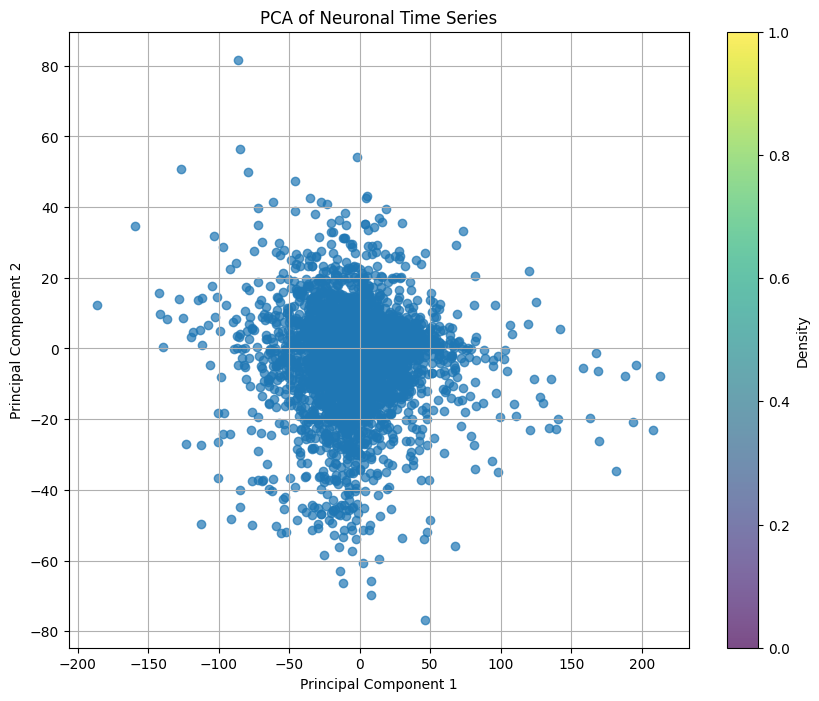

In [ ]:
import matplotlib.pyplot as plt

# Plotting the first two principal components
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.title('PCA of Neuronal Time Series')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Density', alpha=0.5)
plt.grid(True)

# Show the plot
plt.show()


KeyboardInterrupt: 

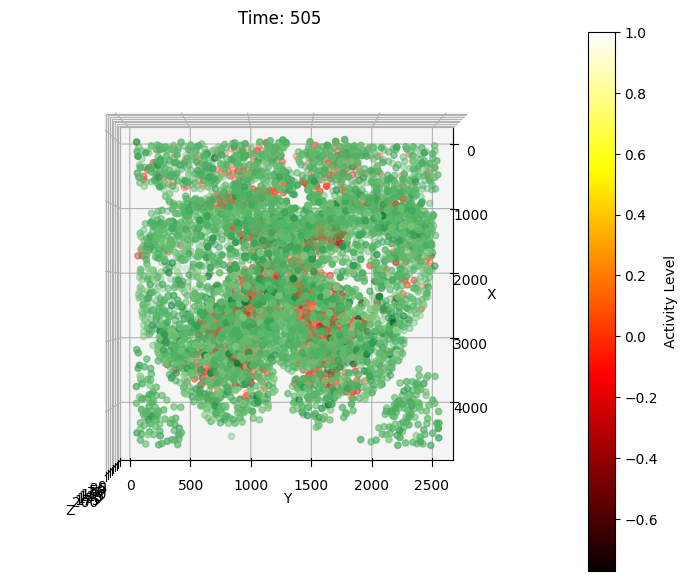

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

# Assuming 'positions', 'dff_filtered', 'green_idx', and 'red_idx' are loaded

n_frames = dff_filtered.shape[1]  # Adjust to use the full time series
frames_dir = 'frames'  # Make sure this directory exists

if not os.path.exists(frames_dir):
    os.makedirs(frames_dir)

for i in range(n_frames):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    # Normalize dff_filtered values for color intensity
    norm_activity = dff_filtered[:, i] / np.max(dff_filtered[:, i])
    
    # Plot inhibitory neurons with one color (e.g., green)|
    inhibitory_positions = positions[green_idx]
    inhibitory_activity = norm_activity[green_idx]
    ax.scatter(inhibitory_positions[:, 0], inhibitory_positions[:, 1], inhibitory_positions[:, 2], 
               c=inhibitory_activity, cmap='Greens', s=20, label='Inhibitory')
    
    # Plot excitatory neurons with another color (e.g., red)
    excitatory_positions = positions[red_idx]
    excitatory_activity = norm_activity[red_idx]
    ax.scatter(excitatory_positions[:, 0], excitatory_positions[:, 1], excitatory_positions[:, 2], 
               c=excitatory_activity, cmap='Reds', s=20, label='Excitatory')
    
    # Set view for top-down perspective
    ax.view_init(elev=90, azim=0)  # Adjust azimuth as needed
    
    ax.set_title(f'Time: {i}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.colorbar(sc, label='Activity Level')
    
    # Save the frame
    frame_path = os.path.join(frames_dir, f'frame_{i:03d}.png')
    plt.savefig(frame_path)
    plt.close()


In [24]:
from moviepy.editor import ImageSequenceClip

# Path to the directory containing your images
image_folder = 'frames'  # Update this to your images' folder path

# Obtain a list of image file paths sorted by file name
# Make sure to adjust the pattern to match your file names and extension
image_files = [os.path.join(image_folder, img) for img in sorted(os.listdir(image_folder)) if img.endswith(('.png', '.jpg', '.jpeg'))]

# Create an image sequence clip with the desired frame rate (frames per second)
fps = 10  # Adjust this value based on how fast you want the video to play
clip = ImageSequenceClip(image_files, fps=fps)

# Write the video file to disk
output_video = 'output_video.mp4'  # Specify the output video file name
clip.write_videofile(output_video, codec='libx264')


OSError: image file is truncated